# Geospatial Climate Analysis of Espírito Santo (Brazil)

## Context
Climate variables such as temperature and precipitation are strongly influenced by
topography and spatial distribution. In regions with complex relief, altitude plays
a fundamental role in shaping local climate patterns.

The state of Espírito Santo presents significant altitudinal variation, ranging from
coastal lowlands to mountainous regions, making it an interesting case for geospatial
climate modeling.


## Objective

The objective of this project is to estimate and analyze the spatial distribution of
annual mean temperature and precipitation across the state of Espírito Santo using:

- Climate normals from meteorological stations
- Digital elevation data
- Geospatial processing and database integration

The final goal is to generate climate maps and analytical insights that may support
decision-making in areas such as agriculture, environmental planning, and regional development.


## Data Sources

This project integrates multiple geospatial and climatic datasets:

- Geographic Boundaries: **IBGE** - Administrative boundaries of the state and municipalities of Espírito Santo.
- Climate Data: **INMET** - Climate normals (annual mean temperature and precipitation) from four meteorological stations:
  - Vitória;
  - São Mateus;
  - Boa Esperança;
  - Muniz Freire.
- Altitude Data: **TOPODATA** - Digital Elevation Model (DEM) used to derive altitude information.
- Agricultural Intelligence: **FERRÃO, R. G.; FERRÃO, M. A. G.; FONSECA, A. F. A. Cultivares de Coffea arabica, para as regiões baixas, quentes, tecnificadas e irrigadas do Estado do Espírito Santo.** Simpósio de Pesquisa dos Cafés do Brasil. Available at: [EMCAPER/Embrapa](https://www.alice.cnptia.embrapa.br/alice/bitstream/doc/902685/1/CultivaresdeCoffeaarabica.pdf).

> <i>**Note**: EMCAPER is the former designation of what is now Incaper (Instituto Capixaba de Pesquisa, Assistência Técnica e Extensão Rural). This study provides the altitudinal (450m–850m) and thermal (18°C–22°C) parameters used for coffee suitability mapping.<i>


All spatial data were processed and stored using a PostGIS-enabled PostgreSQL database.


## Methodology Overview

The analysis was conducted through an integrated workflow combining SQL, PostGIS,
QGIS, and Python:

1. Spatial data integration and preprocessing in PostGIS
2. Estimation of temperature using an altitudinal lapse rate model
3. Spatial interpolation of precipitation data
4. Exploratory and analytical visualization in Python
5. Interpretation of results from a spatial and applied perspective

Analysis Parameters and Technical Basis

The spatial filters used to categorize coffee suitability were based on the research "Cultivares de Coffea arabica, para as regiões baixas, quentes, tecnificadas e irrigadas do Estado do Espírito Santo", published by Ferrão et al. (Incaper/Embrapa).

According to the study, the traditional Arabica production in Espírito Santo is predominant in family-based farms at altitudes between 450 and 850 meters, while the northern lowlands (below 450m) are traditionally dominated by Conilon (Robusta) coffee due to higher temperatures.

## Temperature Estimation Using Altitudinal Lapse Rate

Temperature was estimated using a simplified altitudinal lapse rate model, assuming
a decrease of **0.65°C for every 100 meters of altitude gain**, relative to sea level.

This approach is widely used in climatology when station density is limited and
topographic variation is significant.


In [16]:
# Importing pandas, SQL alchemy, matplotlib and seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import getpass

In [2]:
user = "postgres"
host = "localhost"
db = "temperatura_altitude_es"
password = getpass.getpass("Digite a senha do banco:") 

engine = create_engine(f'postgresql://{user}:{password}@{host}:5432/{db}')

Digite a senha do banco: ········


## Climate Estimation View (PostGIS)

The PostGIS view used in this analysis integrates:

- Municipal geometries
- Mean altitude derived from the DEM
- Estimated annual mean temperature calculated via the lapse rate model

This approach centralizes spatial processing in the database layer, improving
consistency and reproducibility.


In [17]:
query = "SELECT * FROM v_estimativa_climatica_es"
df = pd.read_sql(query, engine)

## Precipitation Estimation

Annual mean precipitation was estimated using data from the same four meteorological
stations. Spatial interpolation was performed in QGIS to generate a continuous surface,
which was then aggregated at the municipal level.

This method allows the visualization of precipitation patterns despite the limited
number of observation points.


In [18]:
# Filtering data for analysis


print(df.head())

   id                                               geom  \
0  74  010600002042120000010000000103000000010000004B...   
1  25  01060000204212000001000000010300000001000000B4...   
2  61  01060000204212000001000000010300000001000000B8...   
3  60  010600002042120000010000000103000000010000007D...   
4   6  0106000020421200000100000001030000000100000023...   

                   NM_MUN  altitude_media   estacao_ref  temperatura_base  \
0               Ibitirama         1134.30  Muniz Freire              22.6   
1      Dores do Rio Preto         1048.92  Muniz Freire              22.6   
2   Santa Maria de Jetibá          898.06       Vitória              24.9   
3        Domingos Martins          874.00       Vitória              24.9   
4  Divino de São Lourenço          958.77  Muniz Freire              22.6   

   altitude_base  temperatura_estimada_celsius  chuva_estimada_mm  
0          530.0                         18.67             1381.0  
1          530.0                        

## Exploratory and Applied Climate Analysis

The following visualizations explore relationships between altitude, temperature,
and spatial variability across Espírito Santo, focusing on interpretable and
decision-oriented climate insights.


## Applied Climate Insights

Based on the estimated temperature and altitude data, it is possible to infer areas
with higher suitability for different coffee crops:

- **Arabica**: higher altitudes and milder temperatures
- **Conilon**: lower altitudes and warmer conditions

These insights may support agricultural planning and regional investment strategies.


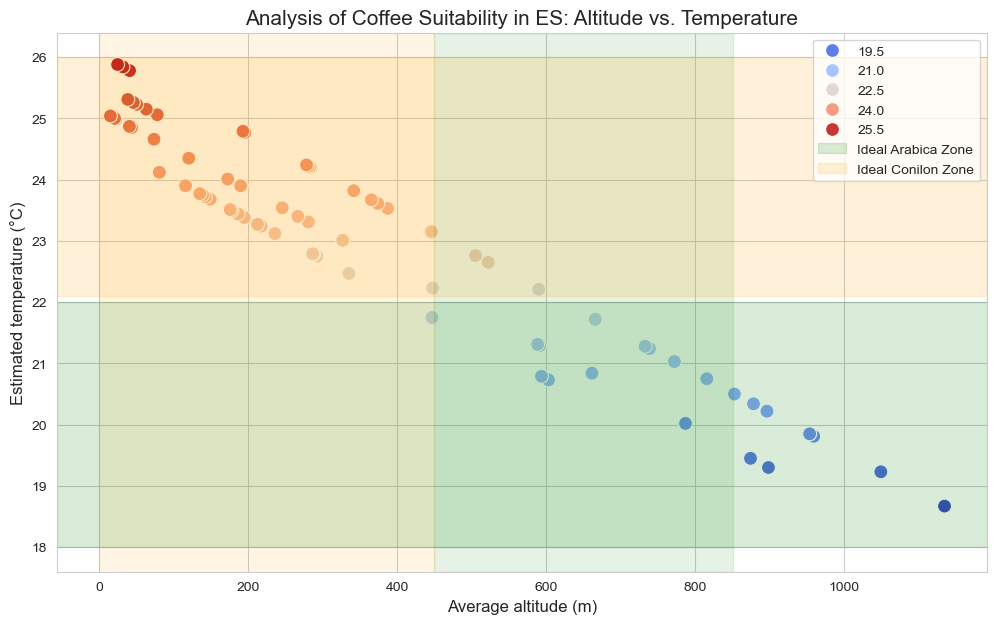

In [19]:
# Altitude × Temperature (Coffee suitability)

plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

scatter = sns.scatterplot(data=df, x='altitude_media', y='temperatura_estimada_celsius', 
                        hue='temperatura_estimada_celsius', palette='coolwarm', s=100)

# Zona Arábica: 450-850m e 18-22°C
plt.axhspan(18, 22, color='green', alpha=0.15, label='Ideal Arabica Zone')
plt.axvspan(450, 850, color='green', alpha=0.1)

# Zona Conilon: < 450m e > 22°C
plt.axhspan(22.1, 26, color='orange', alpha=0.15, label='Ideal Conilon Zone')
plt.axvspan(0, 449, color='orange', alpha=0.1)

plt.title('Analysis of Coffee Suitability in ES: Altitude vs. Temperature', fontsize=15)
plt.xlabel('Average altitude (m)', fontsize=12)
plt.ylabel('Estimated temperature (°C)', fontsize=12)
plt.legend(loc='upper right')

plt.show()

### Interpretation

This graph correlates mean altitude with estimated temperature derived from the
altitudinal lapse rate model. The shaded areas represent technical suitability zones
for coffee cultivation:

- **Arabica Coffee**: altitudes between 450 m and 850 m and temperatures between 18°C and 22°C
- **Conilon Coffee**: altitudes below 450 m and temperatures above 22°C

These thresholds follow technical recommendations for coffee zoning and highlight
the influence of topography on agricultural suitability.

The shaded areas in the plot represent the altitude-temperature thresholds identified in the Incaper literature, highlighting the transition between Arabica and Conilon climate zones.


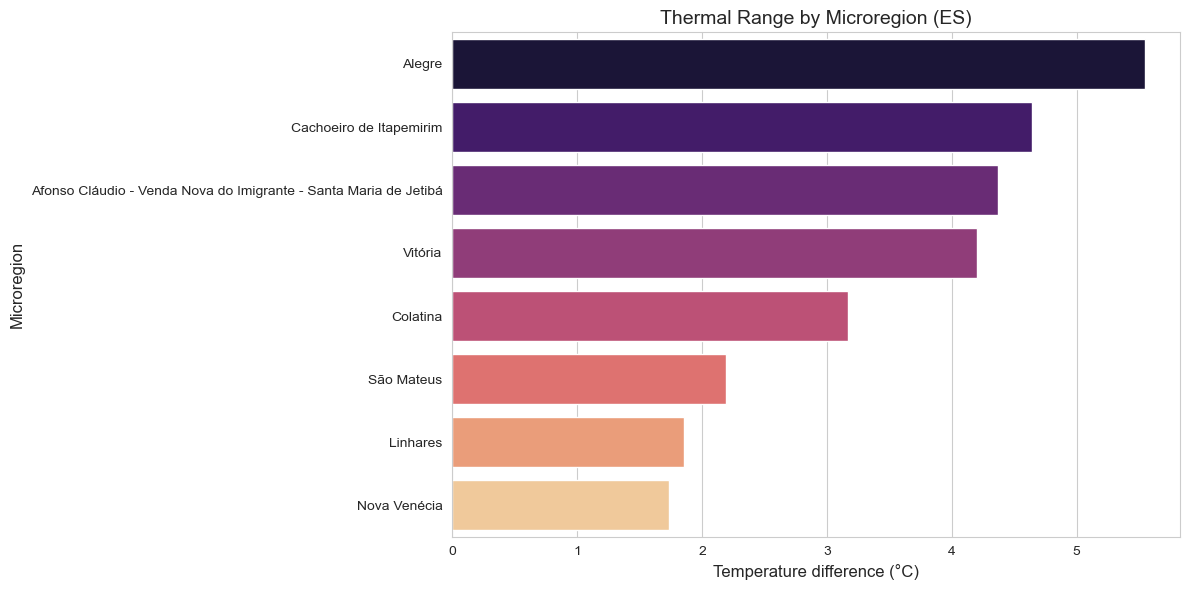

In [20]:
# Thermal amplitude by microregion

query_amp = """
    SELECT 
        m."NM_RGI" as regiao, 
        (MAX(v.temperatura_estimada_celsius) - MIN(v.temperatura_estimada_celsius)) as amplitude_val
    FROM municipios_es m
    JOIN v_estimativa_climatica_es v ON m.id = v.id
    GROUP BY m."NM_RGI"
    ORDER BY amplitude_val DESC
"""

df_amp = pd.read_sql(query_amp, engine)
df_amp['amplitude_val'] = pd.to_numeric(df_amp['amplitude_val'], errors='coerce')

plt.figure(figsize=(12, 6))

sns.barplot(
    data=df_amp, 
    x='amplitude_val', 
    y='regiao', 
    palette='magma',
    hue='regiao',
    legend=False
)

plt.title('Thermal Range by Microregion (ES)', fontsize=14)
plt.xlabel('Temperature difference (°C)', fontsize=12)
plt.ylabel('Microregion', fontsize=12)

plt.tight_layout()
plt.show()

### Interpretation

This graph analyzes the thermal amplitude (maximum minus minimum temperature)
for each microregion of Espírito Santo. Regions with higher thermal amplitude
indicate greater topographic variability, while lower amplitudes suggest more
uniform relief.

Thermal amplitude is an important proxy for understanding climatic variability,
with direct implications for agriculture, infrastructure planning, and land use.


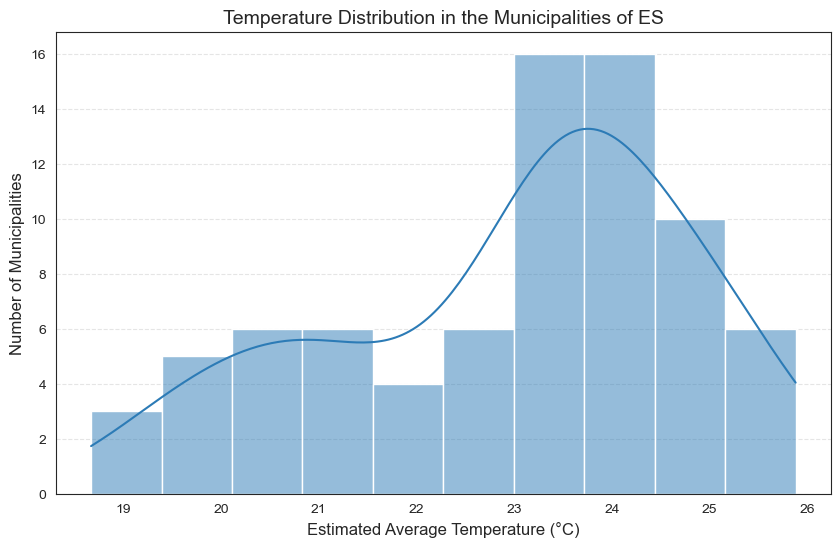

In [21]:
# Temperature distribution histogram

df_hist = pd.read_sql("SELECT temperatura_estimada_celsius FROM v_estimativa_climatica_es", engine)

df_hist['temperatura_estimada_celsius'] = pd.to_numeric(df_hist['temperatura_estimada_celsius'], errors='coerce')
df_hist = df_hist.dropna(subset=['temperatura_estimada_celsius'])

plt.figure(figsize=(10, 6))

sns.set_style("white")
sns.histplot(df_hist['temperatura_estimada_celsius'], bins=10, kde=True, color='#2c7bb6')

plt.title('Temperature Distribution in the Municipalities of ES', fontsize=14)
plt.xlabel('Estimated Average Temperature (°C)', fontsize=12)
plt.ylabel('Number of Municipalities', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

### Interpretation

This histogram reveals the concentration of municipalities across temperature ranges.
The predominance of cities with mean annual temperatures above 23°C suggests regions
with potentially higher demand for energy infrastructure and urban cooling solutions.

This distribution complements the spatial patterns observed in the temperature maps,
reinforcing regional climate contrasts.


## Final Remarks

Despite the limited number of meteorological stations, the integration of elevation
data, spatial databases, and geoprocessing tools allowed the extraction of meaningful
climate patterns across Espírito Santo.

This project highlights the potential of geospatial data science for environmental,
agricultural, and regional planning applications.
